## Trabalho T4 - Integração Numérica

### MTM224 - Mét. Numéricos Computacionais

**Curso:** Ciência da Computação

**Nome(s):** Augusto Kist Lunardi, Felipe da Cas Becker e Jonathan Weber Nogueira

### Questão 1
Use os programas desenvolvidos nas aulas para integrar numericamente a função $$\int_0^3{x^2e^x}dx$$ usando a regra dos trapézios, a regra de 1/3 de Simpson e a regra de 3/8 de Simpson com 12 subintervalos. Compare os resultados obtidos com a solução exata.


Resultado da integração numérica usando o método dos trapézios:  99.99331
Erro absoluto:  1.5656284637581308
Resultado da integração numérica usando o método 1/3 de Simpson: 98.44175
Erro absoluto:  0.014067763847194215
Resultado da integração numérica usando o método 3/8 de Simpson: 98.45893
Erro absoluto:  0.03124337276567246
Resultado da integração numérica usando o scipy: 98.42768


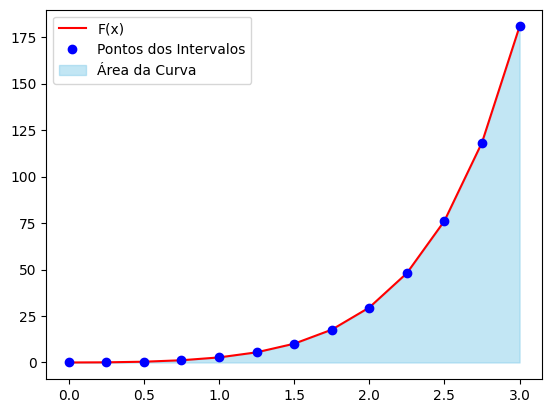

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad

def trapezoidal_integration(x, y):
    n, integral = len(x), 0
    for i in range(1, n):
        h = (x[i] - x[i - 1])
        integral += 0.5 * h * (y[i] + y[i - 1]) 
    return integral

def simpson_13(x, y):
    n, integral = len(x), 0
    h = x[1] - x[0]
    for i in range(0, n - 2, 2):
        integral += (1/3) * h * (y[i] + 4*y[i + 1] + y[i + 2])
    return integral

def simpson_38(x, y):
    n, integral = len(x), 0
    h = x[1] - x[0]
    for i in range(0, n - 3, 3):
        integral += (3/8) * h * (y[i] + 3*y[i + 1] + 3*y[i + 2] + y[i + 3])
    return integral

f = lambda x: x**2 * np.e**x
a, b = 0,3
x = np.linspace(a,b,13)
y = [f(i) for i in x]

result = quad(f, a, b) #retorna uma tupla (resultado,erro)
result1 = trapezoidal_integration(x, y)
result2 = simpson_13(x,y)
result3 = simpson_38(x,y)

print("Resultado da integração numérica usando o método dos trapézios: ", round(result1,5))
print(f'Erro absoluto: ', abs(result - result1)[0])
print("Resultado da integração numérica usando o método 1/3 de Simpson:", round(result2,5))
print(f'Erro absoluto: ', abs(result - result2)[0])
print("Resultado da integração numérica usando o método 3/8 de Simpson:", round(result3,5))
print(f'Erro absoluto: ', abs(result - result3)[0])
print("Resultado da integração numérica usando o scipy:", round(result[0], 5))

plt.plot(x, y, "r",label = "F(x)")
plt.plot(x, y, 'bo',label = "Pontos dos Intervalos")
plt.fill_between(x, y,color='skyblue', alpha=0.5, label = "Área da Curva")
plt.legend()
plt.show()


### Questão 2
De um velocímetro de um automóvel foram obtidas as seguintes leituras de velocidade instantânea:
$$
\begin{array}{ccccccccccc}
\hline
t(min) &0 &4 &8 &12 &16 &20 &24 &28 &32 &36 &40 \\ \hline
v(km/h) &24 &23 &35 &39 &45 &49 &55 &58 &64 &71 &79\\ \hline
\hline
\end{array}
$$
Calcule a distância, depois de 40 minutos, em quilômetros, percorrida pelo automóvel utilizando algum dos métodos e programas vistos em aula.


Resultado da integração numérica usando o método dos trapézios: 32.7 Km


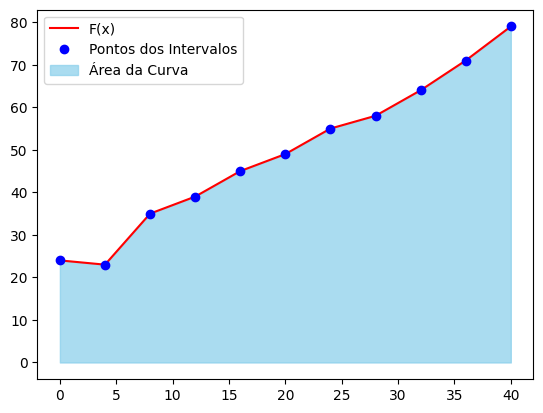

In [3]:
import matplotlib.pyplot as plt

def trapezoidal_integration(t, v):
    n = len(t)
    integral = 0
    for i in range(1, n):
        h = (t[i] - t[i - 1]) /60 # converte minutos para horas
        integral += 0.5 * (v[i] + v[i - 1]) * h
    return integral

t = [0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40]
v = [24, 23, 35, 39, 45, 49, 55, 58, 64, 71, 79]

result = trapezoidal_integration(t, v)

print("Resultado da integração numérica usando o método dos trapézios:", result, "Km")

plt.plot(t, v, "r",label = "F(x)")
plt.plot(t, v, 'bo',label = "Pontos dos Intervalos")
plt.fill_between(t, v,color='skyblue', alpha=0.7, label = "Área da Curva")
plt.legend()
plt.show()


### QUESTÃO 3

Suponha que uma força para cima de resistência do ar em um objeto em queda livre seja proporcional
	ao quadrado da velocidade. Nesse caso, a velocidade pode ser calculada por 
	$$ v(t) = \sqrt{\frac{gm}{c_d}} tanh\left(\sqrt{\frac{gc_d}{m}}t\right)$$
em que $c_d$ é o coeficiente de arrasto de segunda ordem. 
	Se $g=9,81 m/s^2$, $m=68,1 kg$, e $c_d=0,25 kg/m$, calcule, usando um programa em Python e integração numérica, quanto o objeto cai em $10 s$. 
	Use um número de intervalos suficientemente grande para que se tenha pelo menos três 
	casas decimais de precisão.

In [10]:
import numpy as np

g = 9.81  
m = 68.1  
Cd = 0.25  
t_max = 10 
reference_distance = 334.178

num_intervalos = 10
h = (t_max - 0) / num_intervalos

def v(t):
    return np.sqrt((g * m) / Cd) * np.tanh(np.sqrt(((g * Cd) / m)) * t)

distancia_anterior = 0

while True:
    intervalos = np.linspace(0, t_max, num_intervalos + 1)

    distancia = (h / 2) * (v(intervalos[0]) + 2 * np.sum(v(intervalos[1:num_intervalos])) + v(intervalos[-1]))

    print(f"Com {num_intervalos} intervalos, a distância é: {distancia:.5f} metros.")

    if distancia >= reference_distance:
        break

    num_intervalos += 100
    h = (t_max - 0) / num_intervalos
    distancia_anterior = distancia

Com 10 intervalos, a distância é: 333.42982 metros.
Com 110 intervalos, a distância é: 334.17199 metros.
Com 210 intervalos, a distância é: 334.17647 metros.
Com 310 intervalos, a distância é: 334.17739 metros.
Com 410 intervalos, a distância é: 334.17772 metros.
Com 510 intervalos, a distância é: 334.17788 metros.
Com 610 intervalos, a distância é: 334.17797 metros.
Com 710 intervalos, a distância é: 334.17802 metros.


### QUESTÃO 4
Usando o método de Euler, determine uma solução aproximada para o PVI dado por
$$ \begin{cases} 
y'= \frac{1}{x^2}-\frac{y}{x}-y^2\\ 
y(1)=-1
\end{cases}$$
com $x \in [1,2]$ e $N=10$.


x: 1.0  y: -1
x: 1.1  y: -0.9
x: 1.2  y: -0.81654
x: 1.3  y: -0.74572
x: 1.4  y: -0.6848
x: 1.5  y: -0.63176
x: 1.6  y: -0.58511
x: 1.7  y: -0.54371
x: 1.8  y: -0.50669
x: 1.9  y: -0.47335
x: 2.0  y: -0.44314


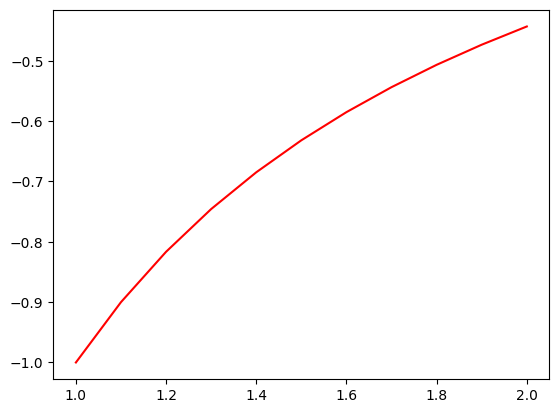

In [11]:
import numpy as np
import matplotlib.pyplot as plt

h = 1/10

def derivada(x,y) :
      return 1/(x**2) -y/x - y**2

X = np.arange(1, 2+h, h)
Y=[-1]

for n in range(len(X)-1):
    Y.append(Y[n] + derivada(X[n],Y[n])*h )

for i in range(len(X)):
    print(f'x: {round(X[i],1)}  y: {round(Y[i],5)}')

plt.plot(X, Y, "r-")
plt.show()


### QUESTÃO 5
Dados o PVI abaixo e a sua solução exata, use dois métodos diferentes para estimar $u(t)$ com o passo sugerido, plote e comente os resultados.

$$ \begin{cases} 
u'= t^2(5-u)\\ 
0 \leq t \leq 2 \\
u(0)=0
\end{cases}$$
Solução exata: $u(t)=5-5e^{-t^3/3}$. Use passo $h=0,25$ e também $h=0,1$.

MÉTODO DE EULER
Method: Euler
Step Size (h) = 0.25
x:  0.0  y:  0  Erro_Abs: 0
x:  0.25  y:  0.0  Erro_Abs: 0.0
x:  0.5  y:  0.07812  Erro_Abs: 0.02597
x:  0.75  y:  0.38574  Erro_Abs: 0.12593
x:  1.0  y:  1.03462  Erro_Abs: 0.27018
x:  1.25  y:  2.02597  Erro_Abs: 0.38272
x:  1.5  y:  3.1877  Erro_Abs: 0.36652
x:  1.75  y:  4.20712  Erro_Abs: 0.18904
x:  2.0  y:  4.81417  Erro_Abs: 0.04488


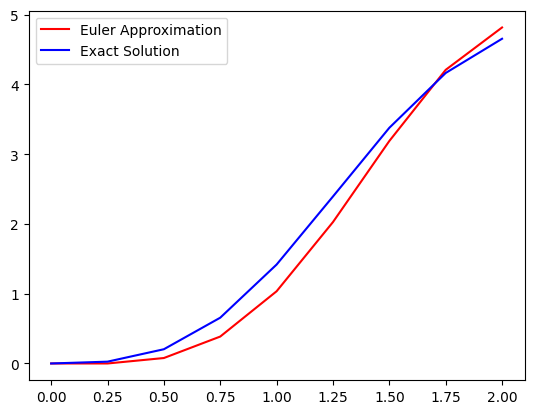

Method: Euler
Step Size (h) = 0.1
x:  0.0  y:  0  Erro_Abs: 0
x:  0.1  y:  0.0  Erro_Abs: 0.0
x:  0.2  y:  0.005  Erro_Abs: 0.00167
x:  0.3  y:  0.02498  Erro_Abs: 0.00832
x:  0.4  y:  0.06976  Erro_Abs: 0.01982
x:  0.5  y:  0.14864  Erro_Abs: 0.03578
x:  0.6  y:  0.26992  Erro_Abs: 0.05541
x:  0.7  y:  0.44021  Erro_Abs: 0.07742
x:  0.8  y:  0.66364  Erro_Abs: 0.09999
x:  0.9  y:  0.94116  Erro_Abs: 0.12085
x:  1.0  y:  1.26993  Erro_Abs: 0.13748
x:  1.1  y:  1.64294  Erro_Abs: 0.14741
x:  1.2  y:  2.04914  Erro_Abs: 0.14867
x:  1.3  y:  2.47406  Erro_Abs: 0.14015
x:  1.4  y:  2.90095  Erro_Abs: 0.12201
x:  1.5  y:  3.31236  Erro_Abs: 0.0958
x:  1.6  y:  3.69208  Erro_Abs: 0.06438
x:  1.7  y:  4.02691  Erro_Abs: 0.03144
x:  1.8  y:  4.30813  Erro_Abs: 0.00093
x:  1.9  y:  4.5323  Erro_Abs: 0.02378
x:  2.0  y:  4.70114  Erro_Abs: 0.04049


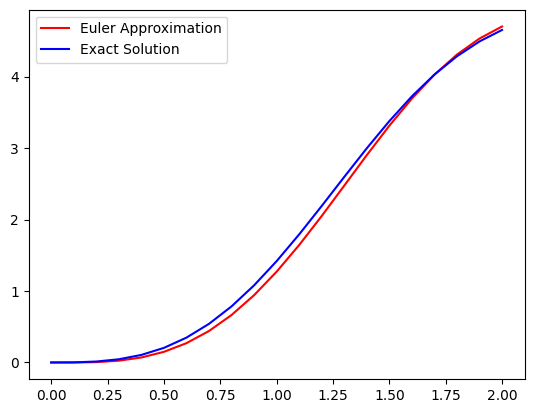


MÉTODO DE TAYLOR

Method: Taylor
Step Size (h) = 0.25
x:  0.0  y:  0  Erro_Abs: 0
x:  0.25  y:  0.0  Erro_Abs: 0.0
x:  0.5  y:  0.15564  Erro_Abs: 0.02597
x:  0.75  y:  0.60034  Erro_Abs: 0.04841
x:  1.0  y:  1.38177  Erro_Abs: 0.05559
x:  1.25  y:  2.3994  Erro_Abs: 0.03557
x:  1.5  y:  3.42002  Erro_Abs: 0.00691
x:  1.75  y:  4.20692  Erro_Abs: 0.04328
x:  2.0  y:  4.66842  Erro_Abs: 0.04469


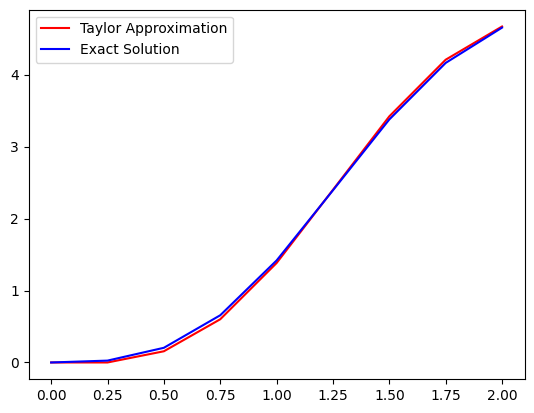


Method: Taylor
Step Size (h) = 0.1
x:  0.0  y:  0  Erro_Abs: 0
x:  0.1  y:  0.0  Erro_Abs: 0.0
x:  0.2  y:  0.01  Erro_Abs: 0.00167
x:  0.3  y:  0.0399  Erro_Abs: 0.00332
x:  0.4  y:  0.09922  Erro_Abs: 0.0049
x:  0.5  y:  0.19661  Erro_Abs: 0.00632
x:  0.6  y:  0.33921  Erro_Abs: 0.00745
x:  0.7  y:  0.53194  Erro_Abs: 0.00814
x:  0.8  y:  0.77679  Erro_Abs: 0.00826
x:  0.9  y:  1.07221  Erro_Abs: 0.0077
x:  1.0  y:  1.41283  Erro_Abs: 0.00643
x:  1.1  y:  1.78948  Erro_Abs: 0.00452
x:  1.2  y:  2.18977  Erro_Abs: 0.00212
x:  1.3  y:  2.59903  Erro_Abs: 0.00048
x:  1.4  y:  3.00172  Erro_Abs: 0.00295
x:  1.5  y:  3.38297  Erro_Abs: 0.00497
x:  1.6  y:  3.73013  Erro_Abs: 0.00623
x:  1.7  y:  4.03392  Erro_Abs: 0.00661
x:  1.8  y:  4.2892  Erro_Abs: 0.00609
x:  1.9  y:  4.49498  Erro_Abs: 0.00485
x:  2.0  y:  4.65398  Erro_Abs: 0.00318


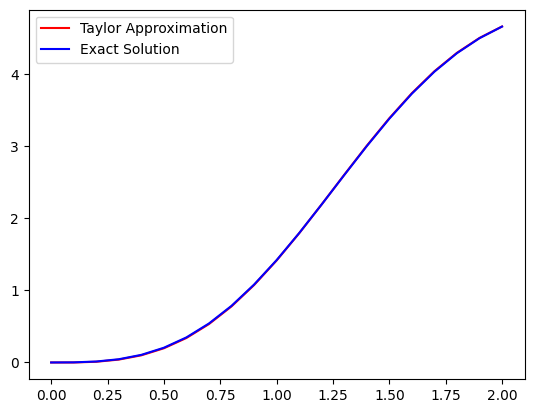

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import math

def derivada(t, u):
    return (t**2) * (5 - u)

def resposta(t):
    return 5 - 5 * (math.e**(((-t)**3) / 3))

def derivada2(t, u):
    return t * (10 - 2 * u) + (t**4) * (u - 5)

def solveEuler(h, x0, xn, y0):
    X = np.arange(x0, xn + h, h)
    Y = [y0]
    erroAbs = [0]
    exato = resposta(X)
    for n in range(len(X) - 1):
        Y.append(Y[n] + derivada(X[n], Y[n]) * h)
        erroAbs.append(abs(exato[n] - Y[n]))
    
    print("Method: Euler")
    print("Step Size (h) =", h)
    for i in range(len(X)):
        print(f'x:  {round(X[i],2)}  y:  {round(Y[i],5)}  Erro_Abs: {round(erroAbs[i],5)}')
    
    plt.plot(X, Y, "r-", label="Euler Approximation")
    plt.plot(X, exato, "b-", label="Exact Solution")
    plt.legend()
    plt.show()

def solveTaylor(h, x0, xn, y0):
    X = np.arange(x0, xn + h, h)
    Y = [y0]
    erroAbs = [0]
    exato = resposta(X)
    for n in range(len(X) - 1):
        Y.append(Y[n] + derivada(X[n], Y[n]) * h + h**2 * derivada2(X[n], Y[n]) / 2)
        erroAbs.append(abs(exato[n] - Y[n]))
    
    print("\nMethod: Taylor")
    print("Step Size (h) =", h)
    for i in range(len(X)):
        print(f'x:  {round(X[i],2)}  y:  {round(Y[i],5)}  Erro_Abs: {round(erroAbs[i],5)}')
    
    plt.plot(X, Y, "r-", label="Taylor Approximation")
    plt.plot(X, exato, "b-", label="Exact Solution")
    plt.legend()
    plt.show()

print("MÉTODO DE EULER")
solveEuler(0.25, 0, 2, 0)
solveEuler(0.1, 0, 2, 0)

print("\nMÉTODO DE TAYLOR")
solveTaylor(0.25, 0, 2, 0)
solveTaylor(0.1, 0, 2, 0)


**Comentários**

Método de Euler:
- Fácil de implementar e compreender.
- Menos preciso em comparação com métodos de ordem superior, como visto na comparação dos gráficos.
- É mais adequado quando a simplicidade e eficiência são mais importantes do que a precisão.

Método das Séries de Taylor:
- Geralmente, requer mais operações computacionais, tornando-o mais exigente em termos de recursos computacionais.
- É preferido quando é crucial ter alta precisão e quando é possível ou conveniente calcular derivadas de ordens superiores.